In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## PIB P/C

In [2]:
pib = pd.read_csv("src\\PIB-dos-Municípios-base-de-dados-2010-2021.csv")

In [3]:
pib_cidades_pe = pib[(pib["Sigla da Unidade da Federação"] == "PE") & (pib['Ano'] == 2021)]

In [4]:
colunas_desejads = ['Nome do Município', 'Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)']

In [5]:
pib_pc = pib_cidades_pe[colunas_desejads]

## IDEB

In [7]:
ideb = pd.read_csv("src\\divulgacao_ensino_medio_municipios_2023.csv")

In [8]:
ideb_pe = ideb[(ideb['SG_UF'] == 'PE') & (ideb['REDE'] == 'Pública')]

In [9]:
colunas_ideb = ['NO_MUNICIPIO', 'IDEB_2021']

In [10]:
ideb_2021_pe = ideb_pe[colunas_ideb]

## Corelação

In [11]:
tabelas_combinadas = pd.merge(
    pib_pc,
    ideb_2021_pe,
    left_on = 'Nome do Município',
    right_on = 'NO_MUNICIPIO',
    how = 'inner'
)

In [12]:
tabelas_combinadas.drop(columns=["NO_MUNICIPIO"], inplace=True) # tira a coluna repetida

In [13]:
# é necessário fazer primeiro um plot para avaliar a linearidade dos dados antes de decidir a correalçaõ utilizada 

In [14]:
tabelas_combinadas_sorted = tabelas_combinadas.sort_values(by="IDEB_2021") # coloquei os dados em ordem crescente para mehlor visualização

<Axes: xlabel='IDEB_2021', ylabel='Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)'>

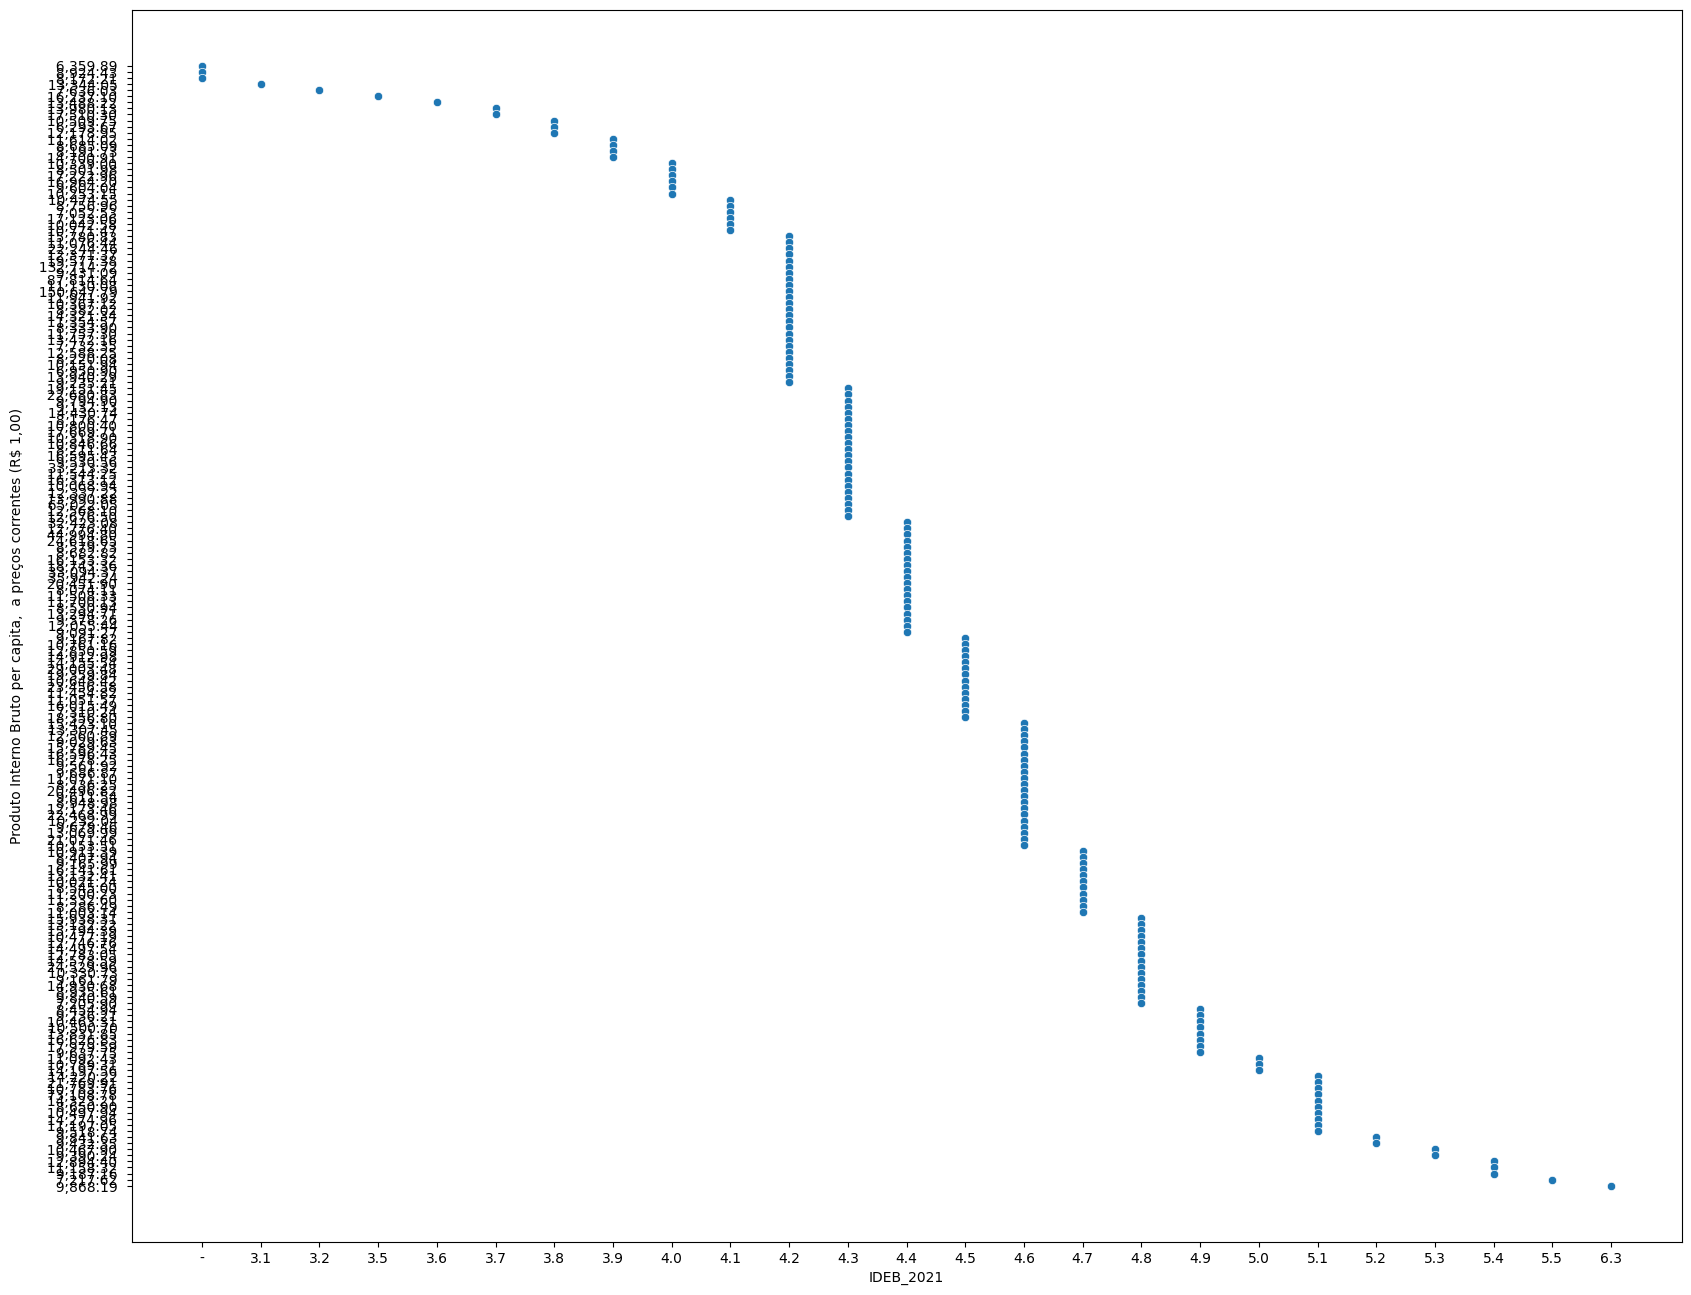

In [15]:
plt.figure(figsize=(20, 16))
sns.scatterplot(tabelas_combinadas_sorted, x='IDEB_2021', y='Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)')

In [16]:
# transformar de string para float os valores para fazer os calculos
tabelas_combinadas_sorted['Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)'] = tabelas_combinadas_sorted['Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)'].str.replace(',', '').astype(float)
tabelas_combinadas_sorted['IDEB_2021'] = tabelas_combinadas_sorted['IDEB_2021'].replace('-', np.nan).str.replace(',', '').astype(float)

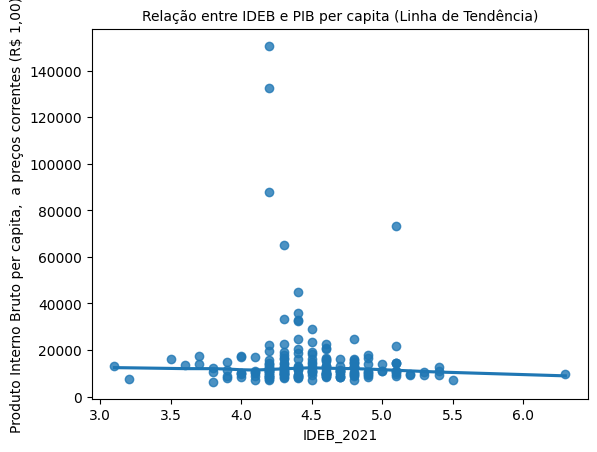

In [17]:
# plot de regressão para observar linearidade 
sns.regplot(
    data=tabelas_combinadas_sorted,
    x='IDEB_2021',
    y='Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)',
    lowess=True, # Linha suave
)
plt.title("Relação entre IDEB e PIB per capita (Linha de Tendência)", fontsize=10)
plt.show()


In [ ]:
from scipy.stats import spearmanr, pearsonr

dados = tabelas_combinadas_sorted[['IDEB_2021', 'Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)']].dropna() # tira os nulos

#separa colunas
ideb = dados['IDEB_2021']
pib = dados['Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)']

spearman_corr, p_value_s = spearmanr(ideb, pib)
pearsonr_corr, p_value_p = pearsonr(ideb, pib)

print(f"Correlação de Spearman entre PIB per capita e IDEB: {spearman_corr}")
print(f"Valor-p da correlação de Spearman: {p_value_s}")

print('')

print(f"Correlação de Pearsonr entre PIB per capita e IDEB: {pearsonr_corr}")
print(f"Valor-p da correlação de Pearsonr: {p_value_p}")


Correlação de Spearman entre PIB per capita e IDEB: -0.02932607325564631
Valor-p da correlação de Spearman: 0.6943275779543413

Correlação de Pearsonr entre PIB per capita e IDEB: -0.07290161892061908
Valor-p da correlação de Pearsonr: 0.3280632223208955


In [19]:
correlacao_spearman = dados['IDEB_2021'].corr(dados['Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)'], method='spearman')
print("Correlação de Spearman:", correlacao_spearman)

Correlação de Spearman: -0.02932607325564631
